In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('~/data/trip.csv')

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64


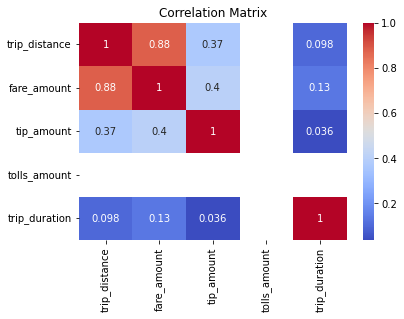

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('~/data/trip.csv')

# 결측치 확인 및 처리
print(data.isnull().sum())
data.dropna(inplace=True)

# 이상치 탐지 및 처리 (IQR method)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# 시간 형식 변환 및 주행 시간 계산
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()

# 결제 방법 통합
data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

# 상관 관계 분석
correlation_matrix = data[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'trip_duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()